In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## get the text files 

In [2]:
with open("./Cryptanalysis/ciphertext.txt",'r') as file:
    cipher_text = file.read()
with open("./Cryptanalysis/hamlet.txt", 'r') as file:
    hamlet_text = file.read() 
with open("./Cryptanalysis/merchantofvenice.txt",encoding = 'utf8') as file:
    merchant_text = file.read()

# define function for to get letters, bigrams , trigrams

In [3]:
def splitting_points_of_strings(string,n = 2):
    out = []
    for i in range(0, len(string), n):
        if check_alpha_string(string[i:i+n]):
            out.append(string[i:i+n])
    return out

In [4]:
# checks if a string is all alphabatical
def check_alpha_string(string):
    for i in string:
        if not i.isalpha():
            return False
    return True
    

In [5]:
def get_dict_occur_num(letters_set,text):
    dict_of_occur = {}
    for i in range(len(letters_set)):
#         if letters_set[i] in dict_of_occur:
        dict_of_occur[letters_set[i]] = text.count(letters_set[i])
    return dict_of_occur

In [6]:
def find_one_two_three_letters_occur(text,l = 1,k = 3):
    """
    function will return a list of dicts of one , two, three, letters occurenece
    """
    text_copy = text.lower()
    dict_list = []
    for i in range(l,k+1,1):
        get_letter_sets = np.unique(splitting_points_of_strings(text_copy, n = i))
        dict_list.append(get_dict_occur_num(get_letter_sets,text_copy))
        
    return dict_list

In [7]:
def find_one_two_three_letters_occur(text,l = 1,k = 3):
    """
    function will return a list of dicts of one , two, three, letters occurenece
    """
    text_copy = text.lower()
    dict_list = []
    for i in range(l,k+1,1):
        get_letter_sets = np.unique(splitting_points_of_strings(text_copy, n = i))
        dict_list.append(get_dict_occur_num(get_letter_sets,text_copy))
        # returns a list of dicts of [letters, bigrams ,trigrams] 
    return dict_list

In [9]:
ciper_dict = find_one_two_three_letters_occur(cipher_text)
hamlet_dicts = find_one_two_three_letters_occur(hamlet_text)
merchant_dicts = find_one_two_three_letters_occur(merchant_text)

In [10]:
hamlet_dicts[0]

{'a': 10288,
 'b': 1823,
 'c': 2798,
 'd': 5135,
 'e': 15673,
 'f': 2736,
 'g': 2427,
 'h': 8702,
 'i': 8885,
 'j': 111,
 'k': 1271,
 'l': 6371,
 'm': 4280,
 'n': 8692,
 'o': 11478,
 'p': 2015,
 'q': 219,
 'r': 7940,
 's': 8667,
 't': 12488,
 'u': 4461,
 'v': 1232,
 'w': 3128,
 'x': 174,
 'y': 3210,
 'z': 125,
 'â': 1251,
 'ã': 2}

# clean up some of the data

In [14]:
hamlet_dicts[0].pop('â')
hamlet_dicts[0].pop('ã')

2

In [ ]:
merchant_dicts[0].pop('æ')
merchant_dicts[0].pop('œ')

## chart the data to see some patterns

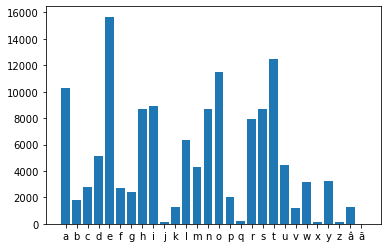

In [65]:
letter = list(hamlet_dicts[0].keys())
values = list(hamlet_dicts[0].values())
plt.bar(range(len(hamlet_dicts[0])),values,tick_label = letter)
plt.show()

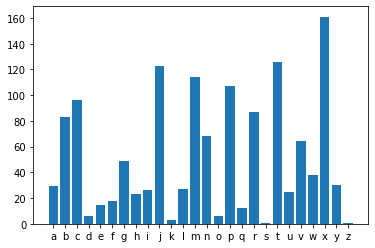

In [67]:
letter = list(ciper_dict[0].keys())
values = list(ciper_dict[0].values())
plt.bar(range(len(ciper_dict[0])),values,tick_label = letter)
plt.show()

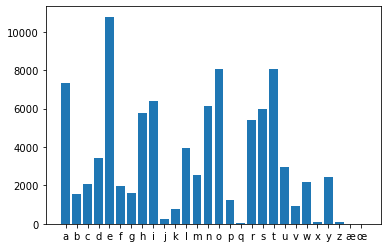

In [21]:
merchant_dicts = find_one_two_three_letters_occur(merchant_text)
letter = list(merchant_dicts[0].keys())
values = list(merchant_dicts[0].values())
plt.bar(range(len(merchant_dicts[0])),values,tick_label = letter)
plt.show()

In [22]:
merchant_dicts[0]

{'a': 7338,
 'b': 1541,
 'c': 2078,
 'd': 3405,
 'e': 10786,
 'f': 1980,
 'g': 1588,
 'h': 5766,
 'i': 6388,
 'j': 231,
 'k': 757,
 'l': 3930,
 'm': 2561,
 'n': 6146,
 'o': 8046,
 'p': 1256,
 'q': 56,
 'r': 5406,
 's': 5972,
 't': 8056,
 'u': 2934,
 'v': 916,
 'w': 2177,
 'x': 109,
 'y': 2451,
 'z': 116,
 'æ': 2,
 'œ': 1}

1

In [24]:
merchant_dicts[0].values()

dict_values([7338, 1541, 2078, 3405, 10786, 1980, 1588, 5766, 6388, 231, 757, 3930, 2561, 6146, 8046, 1256, 56, 5406, 5972, 8056, 2934, 916, 2177, 109, 2451, 116])

In [25]:
list(merchant_dicts[0].keys())

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [92]:
df_letters = pd.DataFrame()
df_letters["letters"] = list(merchant_dicts[0].keys())
df_letters["mechant_text"] = list(merchant_dicts[0].values())
df_letters["hamlet_text"] = list(hamlet_dicts[0].values())
df_letters["cipher_text"] = list(ciper_dict[0].values())
df_letters

,letters,mechant_text,hamlet_text,cipher_text
0,a,7338,10288,29
1,b,1541,1823,83
2,c,2078,2798,96
3,d,3405,5135,6
4,e,10786,15673,15
5,f,1980,2736,18
6,g,1588,2427,49
7,h,5766,8702,23
8,i,6388,8885,26
9,j,231,111,123


In [105]:
ano_df = df_letters.set_index("letters")

In [107]:
ano_df

,mechant_text,hamlet_text,cipher_text
letters,,,
a,7338,10288,29
b,1541,1823,83
c,2078,2798,96
d,3405,5135,6
e,10786,15673,15
f,1980,2736,18
g,1588,2427,49
h,5766,8702,23
i,6388,8885,26


In [108]:
ano_df.T.corr()

letters,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
letters,,,,,,,,,,,,,,,,,,,,,
a,1.000000,0.991370,0.999739,0.998496,0.999638,0.999948,0.997393,0.998435,0.999981,0.149096,...,0.846708,0.999255,0.999670,0.996911,0.998041,0.999830,0.999755,-0.050416,0.998622,0.976353
b,0.991370,1.000000,0.994104,0.982691,0.987482,0.992658,0.979326,0.982486,0.992162,0.277440,...,0.769650,0.985572,0.987677,0.978010,0.981227,0.993618,0.988226,-0.180910,0.996883,0.996267
c,0.999739,0.994104,1.000000,0.996984,0.998763,0.999920,0.995486,0.996898,0.999862,0.171630,...,0.834342,0.998114,0.998824,0.994858,0.996353,0.999990,0.998989,-0.073202,0.999560,0.981033
d,0.998496,0.982691,0.996984,1.000000,0.999610,0.997883,0.999849,0.999999,0.998137,0.094656,...,0.874606,0.999868,0.999574,0.999718,0.999970,0.997316,0.999465,0.004418,0.994243,0.963031
e,0.999638,0.987482,0.998763,0.999610,1.000000,0.999311,0.998974,0.999578,0.999452,0.122430,...,0.860721,0.999932,0.999999,0.998663,0.999363,0.998972,0.999989,-0.023519,0.996849,0.970181
f,0.999948,0.992658,0.999920,0.997883,0.999311,1.000000,0.996604,0.997811,0.999992,0.159193,...,0.841227,0.998808,0.999356,0.996056,0.997350,0.999966,0.999477,-0.060619,0.999106,0.978511
g,0.997393,0.979326,0.995486,0.999849,0.998974,0.996604,1.000000,0.999868,0.996928,0.077357,...,0.882893,0.999435,0.998917,0.999979,0.999954,0.995894,0.998746,0.021781,0.992233,0.958208
h,0.998435,0.982486,0.996898,0.999999,0.999578,0.997811,0.999868,1.000000,0.998069,0.093557,...,0.875141,0.999849,0.999542,0.999743,0.999978,0.997234,0.999428,0.005522,0.994124,0.962733
i,0.999981,0.992162,0.999862,0.998137,0.999452,0.999992,0.996928,0.998069,1.000000,0.155214,...,0.843398,0.998997,0.999492,0.996405,0.997635,0.999925,0.999599,-0.056597,0.998928,0.977672


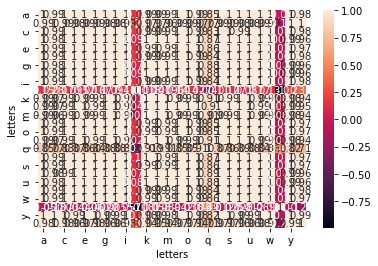

In [109]:
import seaborn as sn
corr_matrix = ano_df.T.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [95]:
df_letter_trans = df_letters.T.copy()
df_letter_trans.columns = df_letter_trans.iloc[0]

In [99]:
df_letter_trans.drop(labels = "letters", axis = 0,inplace = True)

In [101]:
df_letters.corr()

,mechant_text,hamlet_text,cipher_text
mechant_text,1.000000,0.997391,-0.224249
hamlet_text,0.997391,1.000000,-0.212006
cipher_text,-0.224249,-0.212006,1.000000


In [102]:
df_letter_trans


letters,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
mechant_text,7338,1541,2078,3405,10786,1980,1588,5766,6388,231,...,56,5406,5972,8056,2934,916,2177,109,2451,116
hamlet_text,10288,1823,2798,5135,15673,2736,2427,8702,8885,111,...,219,7940,8667,12488,4461,1232,3128,174,3210,125
cipher_text,29,83,96,6,15,18,49,23,26,123,...,12,87,1,126,25,64,38,161,30,1


In [ ]:
sorted(ciph)

## sorting out our cipher letters and finding patterns 

In [34]:
cipher_sorted_one_let = sorted(ciper_dict[0].items(),key = lambda item: item[1])[::-1]

In [35]:
ham_sorted_one_let = sorted(hamlet_dicts[0].items(),key = lambda item: item[1])[::-1]

In [39]:
dict_map_one_let  = {}
for i in range(len(cipher_sorted_one_let)):
    dict_map_one_let[cipher_sorted_one_let[i][0]] = ham_sorted_one_let[i][0]

In [54]:
def letter_map(cipher_dict,reference_dict):
    """
    return the letters mapping of one letter sorted in deseceding order first
    """
    letter_map = {}
    cipher_sorted_one_let = sorted(cipher_dict.items(),key = lambda item: item[1])[::-1]
    ref_sorted_one_let = sorted(reference_dict.items(),key = lambda item: item[1])[::-1]
    
    for i in range(len(cipher_sorted_one_let)):
        letter_map[cipher_sorted_one_let[i][0]] = ref_sorted_one_let[i][0]
    # return the one letter mapping
    return letter_map

In [55]:
dict_map_one_let

{'x': 'e',
 't': 't',
 'j': 'o',
 'm': 'a',
 'p': 'i',
 'c': 'h',
 'r': 'n',
 'b': 's',
 'n': 'r',
 'v': 'l',
 'g': 'd',
 'w': 'u',
 'y': 'm',
 'a': 'y',
 'l': 'w',
 'i': 'c',
 'u': 'f',
 'h': 'g',
 'f': 'p',
 'e': 'b',
 'q': 'k',
 'o': 'v',
 'd': 'q',
 'k': 'x',
 'z': 'z',
 's': 'j'}

In [56]:
ciper_dict[0]

{'a': 29,
 'b': 83,
 'c': 96,
 'd': 6,
 'e': 15,
 'f': 18,
 'g': 49,
 'h': 23,
 'i': 26,
 'j': 123,
 'k': 3,
 'l': 27,
 'm': 114,
 'n': 68,
 'o': 6,
 'p': 107,
 'q': 12,
 'r': 87,
 's': 1,
 't': 126,
 'u': 25,
 'v': 64,
 'w': 38,
 'x': 161,
 'y': 30,
 'z': 1}

In [57]:
letter_map(ciper_dict[0],hamlet_dicts[0])

{'x': 'e',
 't': 't',
 'j': 'o',
 'm': 'a',
 'p': 'i',
 'c': 'h',
 'r': 'n',
 'b': 's',
 'n': 'r',
 'v': 'l',
 'g': 'd',
 'w': 'u',
 'y': 'm',
 'a': 'y',
 'l': 'w',
 'i': 'c',
 'u': 'f',
 'h': 'g',
 'f': 'p',
 'e': 'b',
 'q': 'k',
 'o': 'v',
 'd': 'q',
 'k': 'x',
 'z': 'z',
 's': 'j'}

In [62]:
ham_map_ref = letter_map(ciper_dict[0],hamlet_dicts[0])

In [63]:
mer_map_ref = letter_map(ciper_dict[0],merchant_dicts[0])

In [66]:
sorted(mer_map_ref.items())

[('a', 'y'),
 ('b', 'h'),
 ('c', 'n'),
 ('d', 'j'),
 ('e', 'p'),
 ('f', 'b'),
 ('g', 'd'),
 ('h', 'g'),
 ('i', 'c'),
 ('j', 'o'),
 ('k', 'z'),
 ('l', 'w'),
 ('m', 'a'),
 ('n', 'r'),
 ('o', 'k'),
 ('p', 'i'),
 ('q', 'v'),
 ('r', 's'),
 ('s', 'q'),
 ('t', 't'),
 ('u', 'f'),
 ('v', 'l'),
 ('w', 'u'),
 ('x', 'e'),
 ('y', 'm'),
 ('z', 'x')]

In [44]:
def derypt_cipher_text(encypted_text, dict_map):
    decrypt_string = ""
    for i in encypted_text:
        if i.isalpha():
            decrypt_string+= dict_map[i]
        else:
            decrypt_string+= i
    return decrypt_string

In [45]:
derypt_cipher_text(cipher_text,dict_map_one_let)

"st oie nawe ihfl yawe chloi cstueln hc a wat'n iatr, atr mlhoe hqel auastno oie yatrdenosyg fkht oie kdanoel hc oie madd hc oie gstu'n kadaye; atr oie gstu nam oie kalo hc oie iatr oiao mlhoe. oiet oie gstu'n yhftoetatye man yiatuer, atr isn oihfuion olhfpder isw, nh oiao oie jhston hc isn dhstn mele dhhner, atr isn gteen nwhoe hte auastno athoiel. oie gstu ylser adhfr oh plstu st oie anolhdhueln, oie yiadreatn, atr oie nhhoinabeln. atr oie gstu nkage, atr nasr oh oie msne wet hc papbdht, mihnheqel niadd lear oisn mlsostu, atr nihm we oie stoelkleoaosht oielehc, niadd pe ydhoier msoi nyaldeo, atr iaqe a yiast hc uhdr aphfo isn teyg, atr niadd pe oie oislr lfdel st oie gsturhw. oiet yawe st add oie gstu'n msne wet; pfo oieb yhfdr tho lear oie mlsostu, thl wage gthmt oh oie gstu oie stoelkleoaosht oielehc. oiet man gstu pedniavval uleaodb olhfpder, atr isn yhftoetatye man yiatuer st isw, atr isn dhlrn mele anohtsnier. thm oie xfeet, pb leanht hc oie mhlrn hc oie gstu atr isn dhlrn, yawe

In [64]:
derypt_cipher_text(cipher_text,mer_map_ref)

"ht oie sawe infl yawe cnloi chtuels nc a wat's iatr, atr mlnoe njel auahtso oie yatrdesohyg fvnt oie vdasoel nc oie madd nc oie ghtu's vadaye; atr oie ghtu sam oie valo nc oie iatr oiao mlnoe. oiet oie ghtu's ynftoetatye mas yiatuer, atr ihs oinfuios olnfbder ihw, sn oiao oie qnhtos nc ihs dnhts mele dnnser, atr ihs gtees swnoe nte auahtso atnoiel. oie ghtu ylher adnfr on blhtu ht oie asolndnuels, oie yiadreats, atr oie snnoisapels. atr oie ghtu svage, atr sahr on oie mhse wet nc babpdnt, minsnejel siadd lear oihs mlhohtu, atr sinm we oie htoelvleoaohnt oielenc, siadd be ydnoier mhoi syaldeo, atr iaje a yiaht nc undr abnfo ihs teyg, atr siadd be oie oihlr lfdel ht oie ghturnw. oiet yawe ht add oie ghtu's mhse wet; bfo oiep ynfdr tno lear oie mlhohtu, tnl wage gtnmt on oie ghtu oie htoelvleoaohnt oielenc. oiet mas ghtu bedsiakkal uleaodp olnfbder, atr ihs ynftoetatye mas yiatuer ht ihw, atr ihs dnlrs mele asonthsier. tnm oie zfeet, bp leasnt nc oie mnlrs nc oie ghtu atr ihs dnlrs, yawe

In [68]:
ciper_dict

[{'a': 29,
  'b': 83,
  'c': 96,
  'd': 6,
  'e': 15,
  'f': 18,
  'g': 49,
  'h': 23,
  'i': 26,
  'j': 123,
  'k': 3,
  'l': 27,
  'm': 114,
  'n': 68,
  'o': 6,
  'p': 107,
  'q': 12,
  'r': 87,
  's': 1,
  't': 126,
  'u': 25,
  'v': 64,
  'w': 38,
  'x': 161,
  'y': 30,
  'z': 1},
 {'ab': 1,
  'ag': 1,
  'am': 6,
  'ap': 8,
  'av': 1,
  'ax': 6,
  'ba': 2,
  'bc': 3,
  'bg': 1,
  'bj': 5,
  'bn': 2,
  'br': 15,
  'bt': 43,
  'bv': 3,
  'bx': 3,
  'cb': 2,
  'cc': 3,
  'cg': 5,
  'ci': 18,
  'cj': 9,
  'cl': 6,
  'cn': 2,
  'cr': 2,
  'ct': 8,
  'cu': 16,
  'cv': 8,
  'cw': 2,
  'cx': 1,
  'cy': 7,
  'dx': 5,
  'eg': 1,
  'ex': 2,
  'fc': 1,
  'fj': 1,
  'fu': 2,
  'fx': 6,
  'gb': 1,
  'gc': 9,
  'gd': 1,
  'ge': 2,
  'gg': 8,
  'gj': 1,
  'gm': 2,
  'gn': 4,
  'gr': 1,
  'gx': 12,
  'hb': 15,
  'ht': 3,
  'ib': 1,
  'ic': 5,
  'im': 2,
  'jb': 7,
  'jc': 5,
  'jm': 4,
  'jp': 66,
  'jr': 4,
  'jv': 5,
  'jx': 14,
  'ku': 3,
  'lm': 6,
  'lr': 1,
  'lx': 9,
  'ma': 1,
  'mb': 5,
 